In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import Random_Forest as r
from Random_Forest import df_store, plots, train_test_split, RandomForestRegressor, metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import plotting as p

Ipython active


In [3]:
df = df_store('data.h5').load_df()
print(df.head())
df.columns

Loading h5: data\data.h5...
dataframe loaded successfully
                 date  Bar OPEN Bid Quote  Bar HIGH Bid Quote  \
0 2002-03-03 19:04:00              0.6100              0.6100   
1 2002-03-03 19:05:00              0.6100              0.6100   
2 2002-03-03 19:06:00              0.6099              0.6099   
3 2002-03-03 19:07:00              0.6099              0.6100   
4 2002-03-03 19:08:00              0.6099              0.6101   

   Bar LOW Bid Quote  Bar CLOSE Bid Quote  Volume  Year  Month  Week  Day  \
0             0.6099               0.6100       0  2002      3     9    3   
1             0.6099               0.6099       0  2002      3     9    3   
2             0.6099               0.6099       0  2002      3     9    3   
3             0.6099               0.6100       0  2002      3     9    3   
4             0.6099               0.6101       0  2002      3     9    3   

   ...  Is_quarter_start  Is_year_end  Is_year_start  not_dupym  daysinmonth  \
0  ...  

Index(['date', 'Bar OPEN Bid Quote', 'Bar HIGH Bid Quote', 'Bar LOW Bid Quote',
       'Bar CLOSE Bid Quote', 'Volume', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'not_dupym', 'daysinmonth', 'aggdays', 'Bar OPEN Bid Quote_lag-1',
       'Hour', 'Minute', 'Second'],
      dtype='object')

In [30]:
list(df.columns)

['date',
 'Bar OPEN Bid Quote',
 'Bar HIGH Bid Quote',
 'Bar LOW Bid Quote',
 'Bar CLOSE Bid Quote',
 'Volume',
 'Year',
 'Month',
 'Week',
 'Day',
 'Dayofweek',
 'Dayofyear',
 'Is_month_end',
 'Is_month_start',
 'Is_quarter_end',
 'Is_quarter_start',
 'Is_year_end',
 'Is_year_start',
 'not_dupym',
 'Hour',
 'Minute',
 'Second',
 'mean']

In [4]:
#df.describe(include='all').T

In [14]:
df = df.sample(n=10000)
def drop_col(df, col_names):
    for col in col_names:
        if col in df.columns:
            df = df.drop(col, axis = 1)
    return df

#labels = np.array(features['Bar OPEN Bid Quote'])
df = drop_col(df, ['aggdays', 'daysinmonth', 'Bar OPEN Bid Quote_lag-1'])
df.iloc[:, 5:].head()

,Volume,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,Hour,Minute,Second,mean
5189543,0,2018,4,16,18,2,108,False,False,False,False,False,False,0,10,46,0,0.793968
1898070,0,2009,3,10,4,2,63,False,False,False,False,False,False,0,3,50,0,0.793968
5183477,0,2018,4,15,12,3,102,False,False,False,False,False,False,0,3,6,0,0.793968
1274826,0,2006,11,45,7,1,311,False,False,False,False,False,False,0,0,56,0,0.793968
1705604,0,2008,8,33,14,3,227,False,False,False,False,False,False,0,1,4,0,0.793968


In [5]:
r.set_rf_samples(20000)

In [15]:
df.head()

,date,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume,Year,Month,Week,Day,...,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,not_dupym,Hour,Minute,Second,mean
5189543,2018-04-18 10:46:00,0.87020,0.87020,0.86998,0.87002,0,2018,4,16,18,...,False,False,False,False,False,0,10,46,0,0.793968
1898070,2009-03-04 03:50:00,0.89010,0.89020,0.89000,0.89020,0,2009,3,10,4,...,False,False,False,False,False,0,3,50,0,0.793968
5183477,2018-04-12 03:06:00,0.87166,0.87177,0.87161,0.87176,0,2018,4,15,12,...,False,False,False,False,False,0,3,6,0,0.793968
1274826,2006-11-07 00:56:00,0.67040,0.67050,0.67040,0.67040,0,2006,11,45,7,...,False,False,False,False,False,0,0,56,0,0.793968
1705604,2008-08-14 01:04:00,0.79690,0.79710,0.79690,0.79710,0,2008,8,33,14,...,False,False,False,False,False,0,1,4,0,0.793968


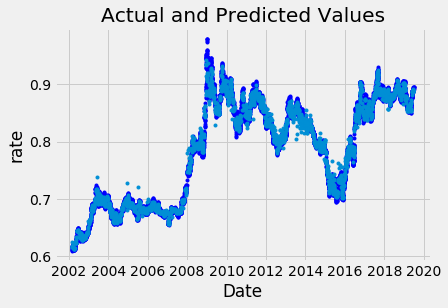

mean_baseline_error: 0.07506304223999999 mean_rfprediction_error: 0.005840090104795631 mean_error_difference: 0.06922295213520435 accuracy (100-MAPE): 99.27419722801646 %
['RMSE of train:', 0.005258956745792941, 'RMSE of test:', 0.009731566569035819, 'RF score (r^2) of train:', 0.9961571422709592, 'RF score (r^2) of (test)', 0.9869154089340446]


In [64]:
import Random_Forest as r
rf = r.do_rf(df, n_estimators=5)
rf.predict_out(True)
rf.return_error_details()
rf.print_score()
#rf.draw()

[0.0, 0.9443740466264758, 0.01181263467147254, 0.0129955977398792, 0.003218346557766022, 0.0009539483154575809, 0.01747222643285751, 6.469092562547842e-05, 4.5335991523045924e-05, 3.836686367684443e-05, 1.7056897635413875e-06, 4.237062580786349e-06, 0.0, 0.0, 0.0038947526043147163, 0.005124110518606946, 0.0, 0.0]
variable: Year                 importance : 0.9443740466264758
variable: Dayofyear            importance : 0.01747222643285751
variable: Week                 importance : 0.0129955977398792
variable: Month                importance : 0.01181263467147254
variable: Minute               importance : 0.005124110518606946
variable: Hour                 importance : 0.0038947526043147163
variable: Day                  importance : 0.003218346557766022
variable: Dayofweek            importance : 0.0009539483154575809
variable: Is_month_end         importance : 6.469092562547842e-05
variable: Is_month_start       importance : 4.5335991523045924e-05
variable: Is_quarter_end       impor

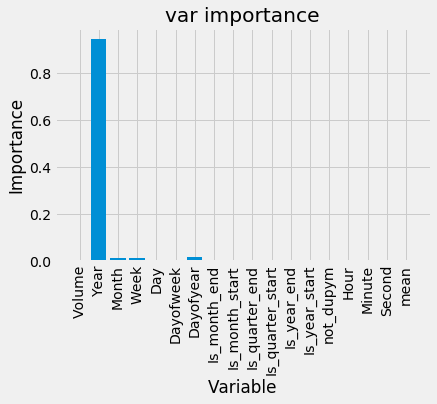

In [44]:
rf.importances()

(array([0.69539231, 0.70032   , 0.70562727, 0.69763846, 0.702375  ]),
 0.7002706083916084,
 0.003573535256486354)

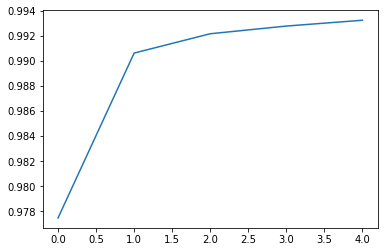

In [28]:
#%time preds = np.stack([tn.predict(train_dependent) for tn in rf.estimators_])
preds = rf.tree_preds()
#def get_preds(tn): return tn.predict(train_dependent)
#preds = np.stack(r.parallel_trees(rf, get_preds, 2))
preds[:,0], np.mean(preds[:,0]), np.std(preds[:,0])

   Dayofweek  Bar OPEN Bid Quote  prediction  prediction_std
0          0            0.793936    0.793527               1
1          1            0.792744    0.793527               1
2          2            0.791958    0.793527               1
3          3            0.796262    0.793527               1
4          4            0.791556    0.793527               1
5          5            0.690100    0.793527               1
6          6            0.792260    0.793527               1


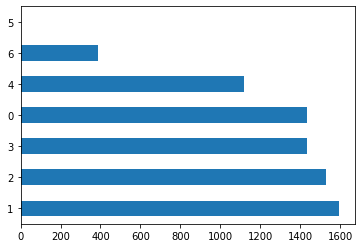

In [29]:
rf.feature_analysis('Dayofweek')

In [ ]:
import plotting as p

In [ ]:
#we choose aggdays and Dayofyear as the most important features
important_indices = [feature_list.index('Year')] #, feature_list.index('Dayofyear')]

train_important=train_dependent[:,important_indices]
test_important=test_dependent[:,important_indices]

rf.fit(train_important, train_independent)

predictions= rf.predict(test_important)

errors = abs(predictions-test_independent)
print(errors)

In [ ]:
years = test_dependent[:, feature_list.index('Year')]
months = test_dependent[:, feature_list.index('Month')]
days = test_dependent[:, feature_list.index('Day')]
hours = test_dependent[:, feature_list.index('Hour')]
minutes = test_dependent[:, feature_list.index('Minute')]
seconds = test_dependent[:, feature_list.index('Second')]
print("YEARS: " , years)
print("MONTHS: " , months)
print("DAYS: " , days)
print("DAYS: " , hours)
print("DAYS: " , minutes)
print("DAYS: " , seconds)

In [ ]:
test_dates = [str(int(year)) + '-' + str(int(month))+'-' + str(int(day)) for year, month, day in zip(years, months, days)]
#test_dates = \
#    [str(int(year)) + '-' + str(int(month))+'-' + str(int(day)) + \
#     ' ' + str(int(hour)) + ':' + str(int(minute))+':' + str(int(second)) \
#     for year, month, day, hour, minute, second in zip(years, months, days, hours, minutes, seconds)]


test_dates = [datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
#test_dates = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in test_dates]
prediction_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})


In [ ]:
prediction_data.head()

In [ ]:

import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(df['date'], df['Bar OPEN Bid Quote'], 'b.', label = 'actual')
ax.plot(prediction_data['date'], prediction_data['prediction'], '.', label = 'prediction')
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Actual and Predicted Values'); plt.xlabel('Date'); plt.ylabel('rate');
plt.show()

In [ ]:
rf = RandomForestRegressor(n_estimators=n_e, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
